In [ ]:
import torchvision
import torch

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#_Data loading
batch_size = 12

train_data = torchvision.datasets.MNIST(root = '~/Desktop/AritificialIntelligence/MNIST_datasets',train = True, download = True, transform = torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root = '~/Desktop/AritificialIntelligence/MNIST_datasets',train = False, download = True, transform = torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [ ]:
#_Model
class MLP(torch.nn.Module):
    def __init__(self,input_dim,output_dim,hidden_layer):
        super().__init__()
        
        self.in_dim = input_dim
        self.out_dim = output_dim
        self.hidden_layer = hidden_layer

        self.unitsize = [self.in_dim]

        for i in range((self.hidden_layer-1),0,-1):
            self.unitsize.append(2**(i+5))
        self.unitsize.append(self.out_dim)

        self.layers = torch.nn.ModuleList([torch.nn.Linear(x,y) for x,y in zip((self.unitsize),(self.unitsize)[1:])])
        self.relu = torch.nn.ReLU()
        
    def forward(self,x):
        out = self.layers[0](x.view(-1,self.in_dim))
        for layer in self.layers[1:]:
            out = self.relu(layer(out))
        return out

In [ ]:
x_axis = []
y_axis = []
for num_layer in range(2,6,):
    # Train
    model = MLP(28*28,10,num_layer)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

    training_epoch = 10
    for epoch in range(training_epoch):
        running_loss = 0.0
        for i,data in enumerate(train_loader,0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if(i+1) % 2000 == 0:
                running_loss = 0.0

    print("Finsihed Training")

    #_Test
    n_predict = 0
    n_correct = 0

    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
    
        n_predict += len(predicted)
        n_correct += (labels == predicted).sum()
        
    y_axis.append(n_correct / n_predict)
    x_axis.append(num_layer)

Finsihed Training
Finsihed Training
Finsihed Training
Finsihed Training


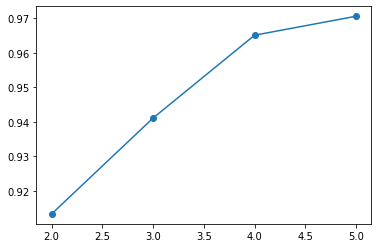

[2, 3, 4, 5] [tensor(0.9133), tensor(0.9411), tensor(0.9651), tensor(0.9706)]


In [ ]:
#Show
plt.plot(x_axis, y_axis, marker = 'o')
plt.show()
print(x_axis,y_axis)